In [187]:
!pip install scikit-learn-intelex

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.3/137.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 122.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 58.6 MB/s eta 0:00:00:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 144.0 MB/s eta 0:00:0000:01


In [195]:
!pip install naive_bayes

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for naive_bayes: filename=naive_bayes-0.1.1-py3-none-any.whl size=2149 sha256=c3160403b6a1b8d2a3fd4962bac7f4e864db631290179fda8a0b6907f19c5447
  Stored in directory: /home/u6292b0d71e6ab65ebc2e1c527c27dbc/.cache/pip/wheels/29/fc/1f/44ea7f6ccb226e209a1fa1c4cfd6cddefa75e1691504542ae5
Successfully built naive_bayes


In [4]:
from sklearnex.linear_model import LinearRegression
from sklearnex.ensemble import RandomForestClassifier
from sklearnex.linear_model import LogisticRegression

ModuleNotFoundError: No module named 'sklearnex'

In [9]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [141]:
data = pd.read_csv('CROPS.csv')

In [142]:
data.head(10)

,DISTRICT,N,P,K,Temperature,Humidity,PH,soil_Moiture,Moisture stage,Crops
0,Ariyalur,90,42,43,20.879744,82.002744,6.502985,25.702741,wet,Mango
1,Chengalpattu,85,58,41,21.770462,80.319644,7.038096,15.340728,moist,sugarcane
2,Chennai,60,55,44,23.004459,82.320763,7.840207,14.681998,normal moist,onion
3,Coimbatore,74,35,40,26.491096,80.158363,6.980401,21.277133,normal wet,millet
4,Cuddalore,78,42,42,20.130175,81.604873,7.628473,20.806752,moist,turmeric
5,Dharmapuri,69,37,42,23.058049,83.370118,7.073454,14.949981,normal moist,Tomato
6,Dindigul,69,55,38,22.708838,82.639414,5.700806,22.625625,wet,sapota
7,Erode,94,53,40,20.277744,82.894086,5.718627,10.250358,dry,Banana
8,Kallakkurichi,89,54,38,24.515881,83.535216,6.685346,27.337104,wet,Maize
9,Kancheepuram,68,58,38,23.223974,83.033227,6.336254,21.076113,moist,Watermelon


In [185]:
crop_pred = data['Crops']
crop_input = data.drop('Crops', axis =1)
crop_pred.head(10)

0         Mango
1     sugarcane
2         onion
3        millet
4      turmeric
5        Tomato
6        sapota
7        Banana
8         Maize
9    Watermelon
Name: Crops, dtype: object

In [184]:
data.size

380

In [148]:
data.dtypes

DISTRICT           object
N                   int64
P                   int64
K                   int64
Temperature       float64
Humidity          float64
PH                float64
soil_Moiture      float64
Moisture stage     object
Crops              object
dtype: object

In [149]:
data['Crops'].value_counts()

Crops
Mango          1
acidic lime    1
coffee         1
black gram     1
guava          1
peanuts        1
cocoa          1
cabbage        1
chilies        1
ginger         1
sugarcane      1
red gram       1
papaya         1
muskmelon      1
green          1
jasmine        1
cashew         1
amla           1
okra           1
coriander      1
brinjal        1
eggplant       1
onion          1
millet         1
turmeric       1
Tomato         1
sapota         1
Banana         1
Maize          1
Watermelon     1
paddy          1
cocount        1
ragi           1
cotton         1
tapioca        1
Jackfruits     1
carrot         1
peppers        1
Name: count, dtype: int64

In [150]:
data['Crops'].unique()

array(['Mango', 'sugarcane', 'onion', 'millet', 'turmeric', 'Tomato',
       'sapota', 'Banana', 'Maize', 'Watermelon', 'paddy', 'cocount',
       'ragi', 'cotton', 'tapioca', 'Jackfruits', 'carrot', 'eggplant',
       'brinjal', 'coriander', 'okra', 'coffee', 'black gram', 'guava',
       'peanuts', 'cocoa', 'cabbage', 'chilies', 'acidic lime', 'ginger',
       'red gram', 'papaya', 'muskmelon', 'green', 'jasmine', 'cashew',
       'amla', 'peppers'], dtype=object)

Text(0.5, 1.0, 'overall values')

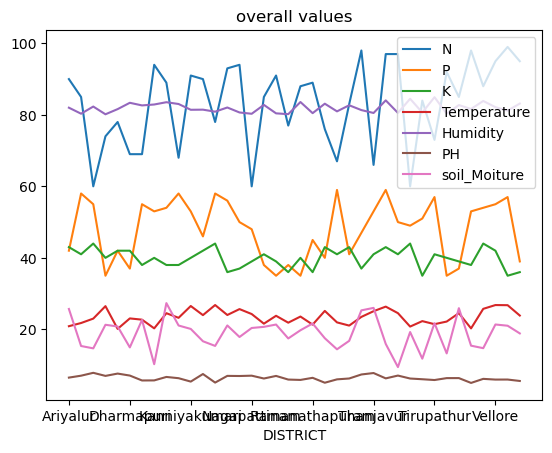

In [151]:
data.plot('DISTRICT')
plt.title('overall values')

In [152]:
data['Moisture stage'] = pd.to_numeric(data['Moisture stage'], errors='coerce')

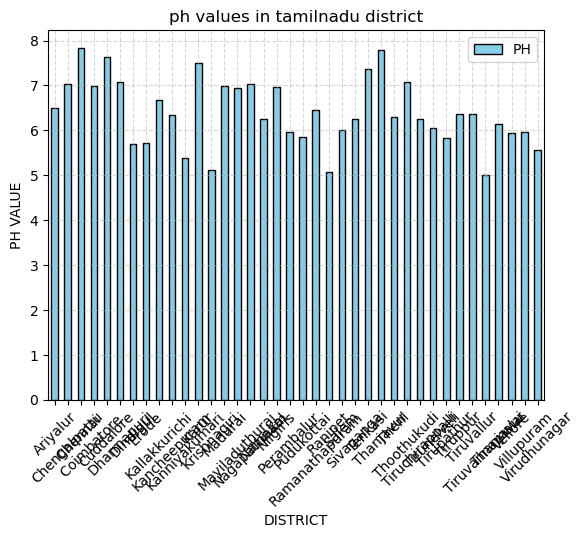

In [153]:
# Assuming 'df' is your DataFrame
ax = data.plot(x='DISTRICT', y='PH', kind='bar', color='skyblue', edgecolor='black')

# Customizing labels and title
ax.set_xlabel('DISTRICT')
ax.set_ylabel('PH VALUE')
ax.set_title('ph values in tamilnadu district')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()


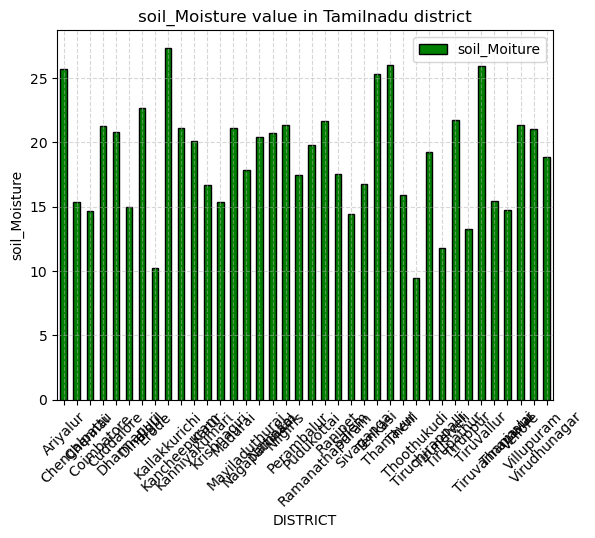

In [154]:
# Assuming 'df' is your DataFrame
ax = data.plot(x='DISTRICT', y='soil_Moiture', kind='bar', color='green', edgecolor='black')

# Customizing labels and title
ax.set_xlabel('DISTRICT')
ax.set_ylabel('soil_Moisture')
ax.set_title('soil_Moisture value in Tamilnadu district')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()


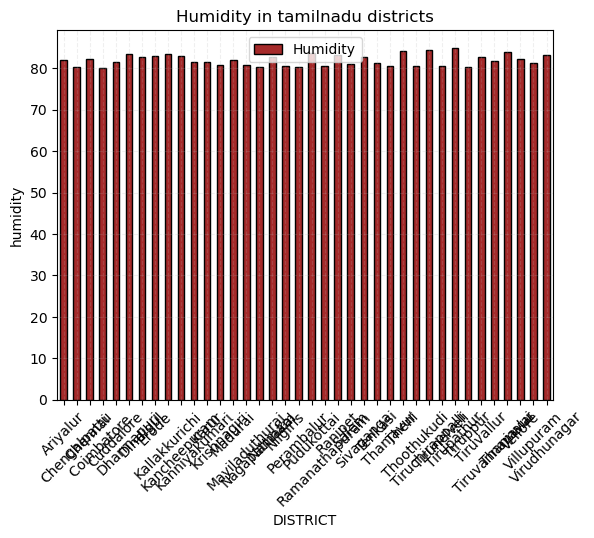

In [29]:
# Assuming 'df' is your DataFrame
ax = df.plot(x='DISTRICT', y='Humidity', kind='bar', color='brown', edgecolor='black')

# Customizing labels and title
ax.set_xlabel('DISTRICT')
ax.set_ylabel('humidity')
ax.set_title('Humidity in tamilnadu districts')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid
plt.grid(True, linestyle='--', alpha=0.2)

# Show plot
plt.show()


In [156]:
features = data[['N', 'P','K','Temperature', 'Humidity', 'PH', 'soil_Moiture']]
target = data['Crops']
labels = data['Crops']

In [41]:
acc = []
model = []

In [42]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [173]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  0.0
              precision    recall  f1-score   support

  Jackfruits       0.00      0.00      0.00       0.0
       Maize       0.00      0.00      0.00       0.0
       Mango       0.00      0.00      0.00       1.0
  Watermelon       0.00      0.00      0.00       1.0
  black gram       0.00      0.00      0.00       0.0
      carrot       0.00      0.00      0.00       1.0
     chilies       0.00      0.00      0.00       1.0
      cotton       0.00      0.00      0.00       1.0
    eggplant       0.00      0.00      0.00       0.0
      ginger       0.00      0.00      0.00       0.0
        okra       0.00      0.00      0.00       0.0
      papaya       0.00      0.00      0.00       1.0
        ragi       0.00      0.00      0.00       1.0
    red gram       0.00      0.00      0.00       1.0
      sapota       0.00      0.00      0.00       0.0
    turmeric       0.00      0.00      0.00       0.0

    accuracy                           0.00   

In [92]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [93]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.0
              precision    recall  f1-score   support

      Banana       0.00      0.00      0.00       0.0
       Mango       0.00      0.00      0.00       1.0
  Watermelon       0.00      0.00      0.00       1.0
      carrot       0.00      0.00      0.00       1.0
     chilies       0.00      0.00      0.00       1.0
   coriander       0.00      0.00      0.00       0.0
      cotton       0.00      0.00      0.00       1.0
    eggplant       0.00      0.00      0.00       0.0
        okra       0.00      0.00      0.00       0.0
       paddy       0.00      0.00      0.00       0.0
      papaya       0.00      0.00      0.00       1.0
        ragi       0.00      0.00      0.00       1.0
    red gram       0.00      0.00      0.00       1.0
      sapota       0.00      0.00      0.00       0.0
   sugarcane       0.00      0.00      0.00       0.0

    accuracy                           0.00       8.0
   macro avg       0.00      0.00      0.00     

In [95]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.0
              precision    recall  f1-score   support

      Banana       0.00      0.00      0.00       0.0
       Mango       0.00      0.00      0.00       1.0
  Watermelon       0.00      0.00      0.00       1.0
        amla       0.00      0.00      0.00       0.0
      carrot       0.00      0.00      0.00       1.0
     chilies       0.00      0.00      0.00       1.0
   coriander       0.00      0.00      0.00       0.0
      cotton       0.00      0.00      0.00       1.0
     jasmine       0.00      0.00      0.00       0.0
      papaya       0.00      0.00      0.00       1.0
        ragi       0.00      0.00      0.00       1.0
    red gram       0.00      0.00      0.00       1.0
      sapota       0.00      0.00      0.00       0.0
    turmeric       0.00      0.00      0.00       0.0

    accuracy                           0.00       8.0
   macro avg       0.00      0.00      0.00       8.0
weighted avg       0.00      0.00      0

In [111]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()


In [177]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.0
              precision    recall  f1-score   support

      Banana       0.00      0.00      0.00       0.0
       Mango       0.00      0.00      0.00       1.0
  Watermelon       0.00      0.00      0.00       1.0
 acidic lime       0.00      0.00      0.00       0.0
        amla       0.00      0.00      0.00       0.0
      carrot       0.00      0.00      0.00       1.0
      cashew       0.00      0.00      0.00       0.0
     chilies       0.00      0.00      0.00       1.0
   coriander       0.00      0.00      0.00       0.0
      cotton       0.00      0.00      0.00       1.0
       guava       0.00      0.00      0.00       0.0
       onion       0.00      0.00      0.00       0.0
      papaya       0.00      0.00      0.00       1.0
        ragi       0.00      0.00      0.00       1.0
    red gram       0.00      0.00      0.00       1.0
    turmeric       0.00      0.00      0.00       0.0

    accuracy                           0.00       8.0
   

In [208]:
N = 93
P = 20
K = 35
temperature = 23.603016
humidity = 20.3
ph = 6.9
Soil_moisture = 20.5
data = np.array([[N,P, K, temperature, humidity,ph,Soil_moisture]])
prediction = RF.predict(data)
print(prediction)

['millet']


In [202]:
N = 95
P = 20
K = 35
temperature = 15.603016
humidity = 29.3
ph = 7.9
Soil_moisture = 10.5
data = np.array([[N,P, K, temperature, humidity,ph,Soil_moisture]])
prediction = RF.predict(data)
print(prediction)

['Banana']


In [203]:
N = 81
P = 23
K = 27
temperature = 19.628916
humidity = 11.6798
ph = 5.9
Soil_moisture = 28.9
data = np.array([[N,P, K, temperature, humidity,ph,Soil_moisture]])
prediction = RF.predict(data)
print(prediction)

['okra']


In [5]:

import joblib

# Load the dataset (example with Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Save the model as a pickle in a file
joblib.dump(classifier, 'iris_classifier.pkl')


NameError: name 'load_iris' is not defined